# Heart disease UCI
## Exploratory Data Analysis and Classification

## Table of contents
1. [Introduction](#Introduction)
2. [Data analysis](#data-analysis)
3. [Visualization](#visualization)
4. [Classification](#classification)
5. [Summary](#summary)

## Introduction <a name="introduction"></a>

The data contains information about 303 patients with chest pain and other medical information.
Given the clinical data it is possible to predict if the patient has a heart disease?


## Data source:
Kaggle - [Heart disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

## Data Analysis <a name="data-analysis"></a>

### Data description
- **age**
- **sex** - 0 = female, 1 = male
- **cp** - chest pain type. 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4= asymptomatic
- **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
- **chol** - serum cholestoral in mg/dl
- **fbs** - fasting blood sugar > 120 mg/dl. 0 = false, 1 = true
- **restecg** - resting electrocardiographic results. 0 =  normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach** - maximum heart rate achieved
- **exang** - exercise induced angina. 0 = no, 1 = yes
- **oldpeak** - oldpeak = ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment. 1 = upsloping, 2 = flat, 3 = downsloping
- **ca** - number of major vessels (0-3) colored by flourosopy
- **thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')


In [2]:
heart_df_raw = pd.read_csv('./data/heart.csv')
heart_df_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Changing the category of oldpeak

In [4]:
heart_df_raw['oldpeak'] = heart_df_raw['oldpeak'].astype('int64')

In [5]:
heart_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  target    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


In [6]:
heart_df_raw.isnull().values.any()

False

In [7]:
heart_df_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.765677,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.070933,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_objects = heart_df_raw[["sex", "cp", "fbs", "restecg", "exang", "oldpeak", "slope", "ca", "thal", "target"]].astype('object')
df_objects.apply(pd.Series.value_counts)


,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,96.0,143.0,258.0,147.0,204.0,166,21.0,175.0,2.0,138.0
1,207.0,50.0,45.0,152.0,99.0,78,140.0,65.0,18.0,165.0
2,NaN,87.0,NaN,4.0,NaN,34,142.0,38.0,166.0,NaN
3,NaN,23.0,NaN,NaN,NaN,17,NaN,20.0,117.0,NaN
4,NaN,NaN,NaN,NaN,NaN,6,NaN,5.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


## Visualization <a name="visualization"></a>

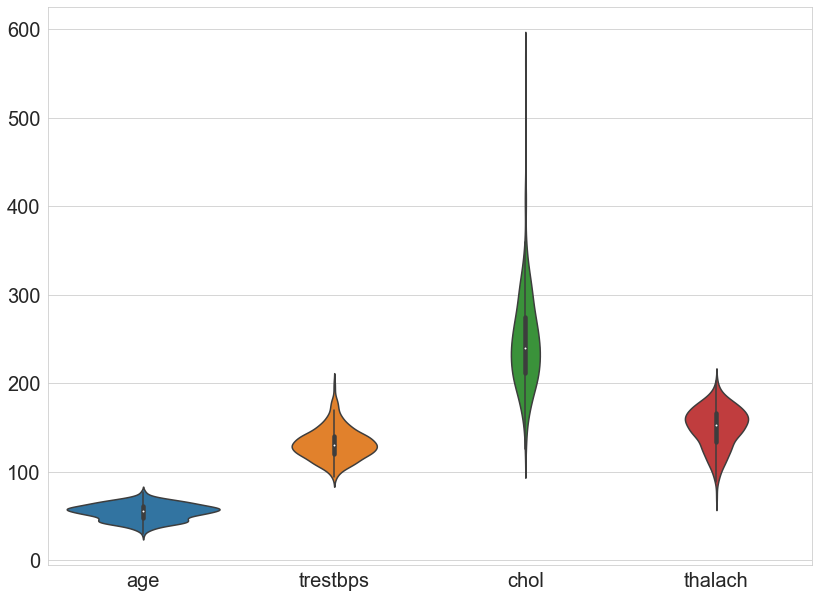

In [9]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
df_boxplot = heart_df_raw[["age", "trestbps", "chol", "thalach"]]
fig.set_size_inches(13.7, 10.27)
ax = sns.violinplot(data=df_boxplot, orient="v")
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.show()

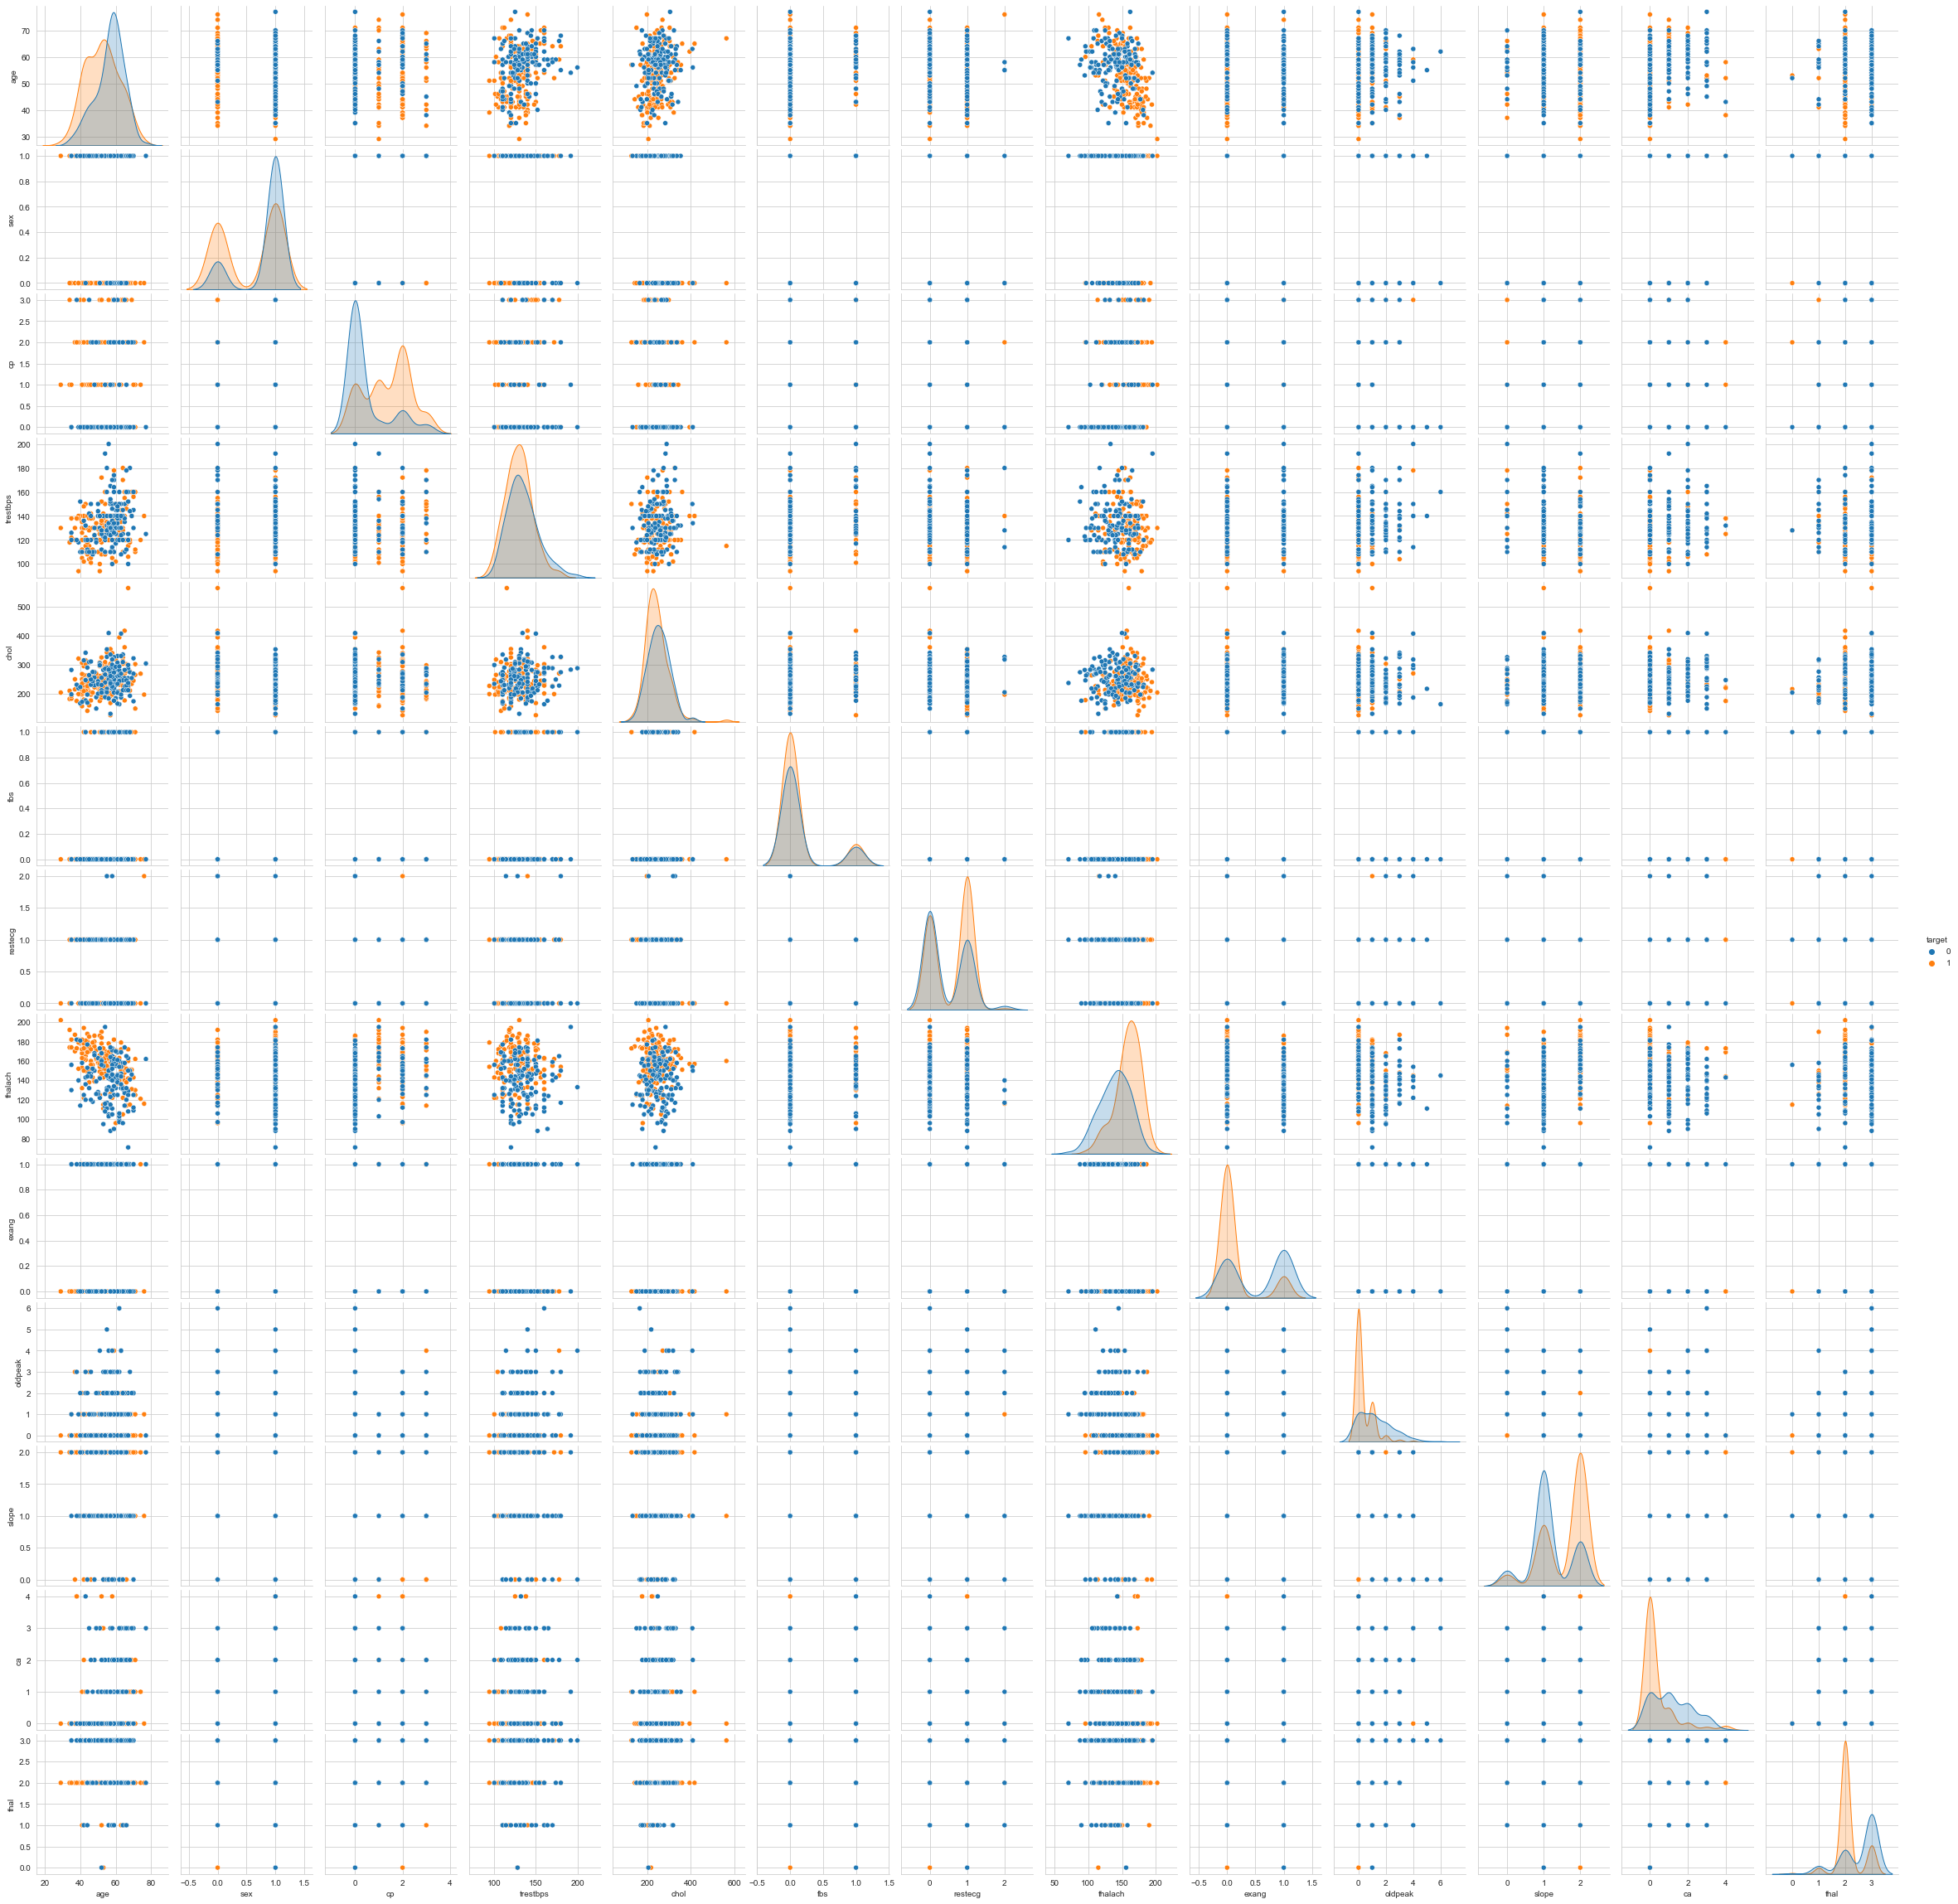

In [10]:
# fig, ax = plt.subplots()
sns.pairplot(heart_df_raw,  hue="target")
plt.show()

<AxesSubplot:>

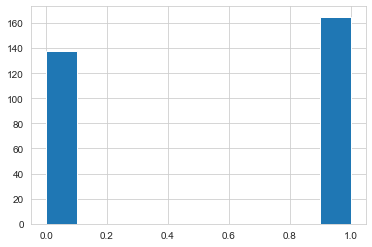

In [11]:
heart_df_raw['target'].hist()

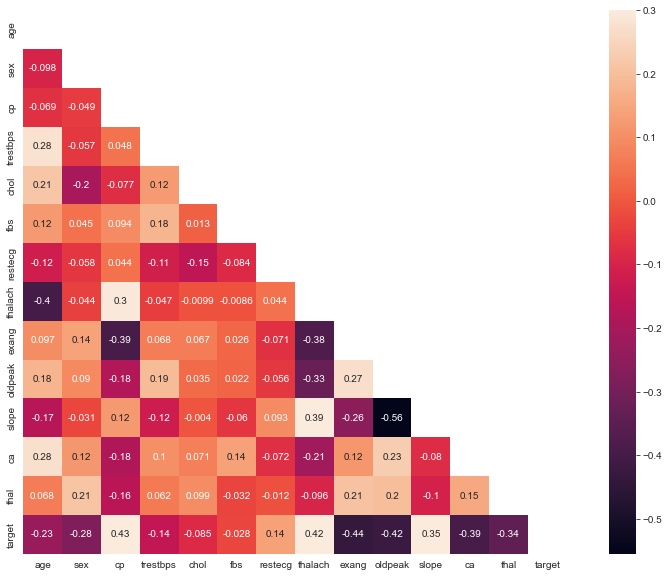

In [12]:
corr = heart_df_raw.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True,)

In [13]:
heart_df_raw.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.423572
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

## Classification <a name="classification"></a>

We will check 4 different method for this data classification:
 - Logistic regression
 - k-Nearest Neighbour
 - Decision Tree
 - Naive Bayes
 - Support Vector Classification

In [25]:
x = heart_df_raw.drop(["target"], axis=1)
y = heart_df_raw["target"]
#Normalization of the data
x_normalized=(x-x.mean())/x.std()
X_train, X_test, y_train, y_test = train_test_split(x_normalized, heart_df_raw["target"], test_size = 0.2, random_state=42)

### Logistic regression

In [15]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [29]:
scores = cross_val_score(model_lr, x_normalized, y, cv=5)
print(f'Cross Validation for k = 5:\n{scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross Validation for k = 5:
[0.83606557 0.85245902 0.81967213 0.86666667 0.75      ]
0.82 accuracy with a standard deviation of 0.04


In [16]:
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(f'Classification report: \n {classification_report(y_test, y_pred_lr)}')
print(f'Confusion matrix: \n{lr_conf_matrix}')

Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix: 
[[25  4]
 [ 6 26]]


### k-Nearest Neighbour

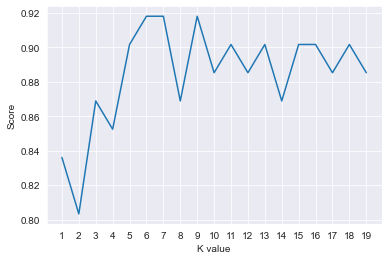

Best accuracy 6 for neighbours


In [44]:
#Finding the best k value:
scores = []
for i in range(1,20):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    scores.append(model_knn.score(X_test, y_test))
    
sns.set_style("darkgrid")    
sns.lineplot(x=range(1,20), y=scores, )
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print(f'Best accuracy {scores.index(max(scores))+1} for neighbours')

In [45]:
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [46]:
scores = cross_val_score(model_knn, x_normalized, y, cv=5)
print(f'Cross Validation for k = 5:\n{scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross Validation for k = 5:
[0.83606557 0.86885246 0.81967213 0.85       0.7       ]
0.81 accuracy with a standard deviation of 0.06


In [48]:
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(f'Classification report: \n {classification_report(y_test, y_pred_knn)}')
print(f'Confusion matrix: \n{knn_conf_matrix}')

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion matrix: 
[[28  1]
 [ 4 28]]


### Decision Tree

In [19]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

In [31]:
scores = cross_val_score(model_tree, x_normalized, y, cv=5)
print(f'Cross Validation for k = 5:\n{scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross Validation for k = 5:
[0.78688525 0.83606557 0.73770492 0.75       0.7       ]
0.76 accuracy with a standard deviation of 0.05


In [20]:
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)
print(f'Depth of decision tree: {model_tree.get_depth()}')
print(f'Classification report: \n {classification_report(y_test, y_pred_tree)}')
print(f'Confusion matrix: \n{tree_conf_matrix}')

Depth of decision tree: 9
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61

Confusion matrix: 
[[27  2]
 [10 22]]


### Naive Bayes

In [21]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

In [32]:
scores = cross_val_score(model_nb, x_normalized, y, cv=5)
print(f'Cross Validation for k = 5:\n{scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross Validation for k = 5:
[0.81967213 0.8852459  0.78688525 0.85       0.71666667]
0.81 accuracy with a standard deviation of 0.06


In [22]:
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
print(f'Classification report: \n {classification_report(y_test, y_pred_nb)}')
print(f'Confusion matrix: \n{nb_conf_matrix}')

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix: 
[[26  3]
 [ 5 27]]


### Support Vector Classification

In [23]:
model_svc = SVC(kernel='sigmoid')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

In [33]:
scores = cross_val_score(model_svc, x_normalized, y, cv=5)
print(f'Cross Validation for k = 5:\n{scores}')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross Validation for k = 5:
[0.81967213 0.91803279 0.80327869 0.83333333 0.73333333]
0.82 accuracy with a standard deviation of 0.06


In [24]:
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
print(f'Classification report: \n {classification_report(y_test, y_pred_svc)}')
print(f'Confusion matrix: \n{svc_conf_matrix}')

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix: 
[[25  4]
 [ 4 28]]


## Summary  <a name="summary"></a>

As we can see, the best accuracy score was obtained with k Nearest Neighbour Classifier. However, the cross-validation scores show, that the model is not that good – it obtains a mean 0.81 accuracy with 0.06 standard deviation. The best results with cross-validation were obtained in logistic regression methods. It is important to note, that the dataset was relatively small, especially with the number of features to analyze. It is recommended to check the models with the bigger sample and then decide which one is best to use.